# Import Librarbies

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression  

# Loading Dataset

In [3]:
df = pd.read_csv('yeast2vs4.csv')
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


# Statistical Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     514 non-null    float64
 1   gvh     514 non-null    float64
 2   alm     514 non-null    float64
 3   mit     514 non-null    float64
 4   erl     514 non-null    float64
 5   pox     514 non-null    float64
 6   vac     514 non-null    float64
 7   nuc     514 non-null    float64
 8   class   514 non-null    object 
dtypes: float64(8), object(1)
memory usage: 36.3+ KB


In [5]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,0.504611,0.482763,0.523463,0.232607,0.504864,0.000973,0.500467,0.256070
std,0.134528,0.103216,0.075013,0.117278,0.049122,0.022054,0.063732,0.091569
min,0.190000,0.210000,0.270000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.420000,0.490000,0.160000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.470000,0.520000,0.200000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.550000,0.560000,0.270000,0.500000,0.000000,0.540000,0.270000
max,0.970000,0.900000,1.000000,1.000000,1.000000,0.500000,0.730000,0.800000


In [6]:
df.nunique()

mcg      69
gvh      55
alm      43
mit      56
erl       2
pox       2
vac      38
nuc      45
class     2
dtype: int64

In [7]:
df.groupby('class').count()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
class,,,,,,,,
negative,463,463,463,463,463,463,463,463
positive,51,51,51,51,51,51,51,51


In [8]:
df.groupby('erl').count()

,mcg,gvh,alm,mit,pox,vac,nuc,class
erl,,,,,,,,
0.5,509,509,509,509,509,509,509,509
1.0,5,5,5,5,5,5,5,5


In [9]:
df.groupby('pox').count()

,mcg,gvh,alm,mit,erl,vac,nuc,class
pox,,,,,,,,
0.0,513,513,513,513,513,513,513,513
0.5,1,1,1,1,1,1,1,1


# Datacleaning

In [10]:
df['class'].unique()

array(['negative', 'positive'], dtype=object)

In [11]:
df['class'] = df['class'].apply( lambda x : 1 if 'pos' in x else 0 )

# Exploratory Data Analysis

In [12]:
df.nunique()

mcg      69
gvh      55
alm      43
mit      56
erl       2
pox       2
vac      38
nuc      45
class     2
dtype: int64

In [13]:
df[df['class']==1].nunique()

mcg      36
gvh      30
alm      26
mit      32
erl       2
pox       1
vac      18
nuc      11
class     1
dtype: int64

In [14]:
df[df['class']==0].nunique()

mcg      55
gvh      50
alm      34
mit      52
erl       2
pox       2
vac      36
nuc      45
class     1
dtype: int64

## Graph analysis

<AxesSubplot:>

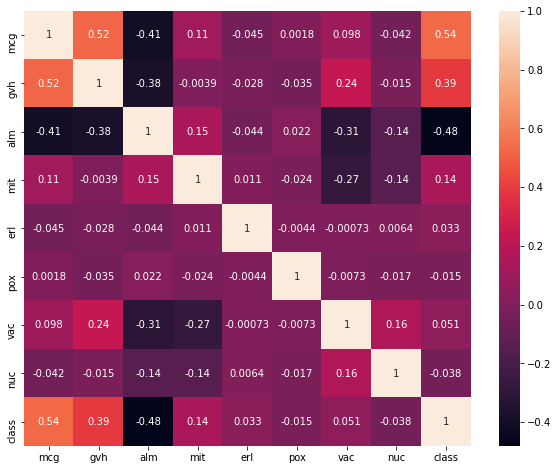

In [15]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap( corr , xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

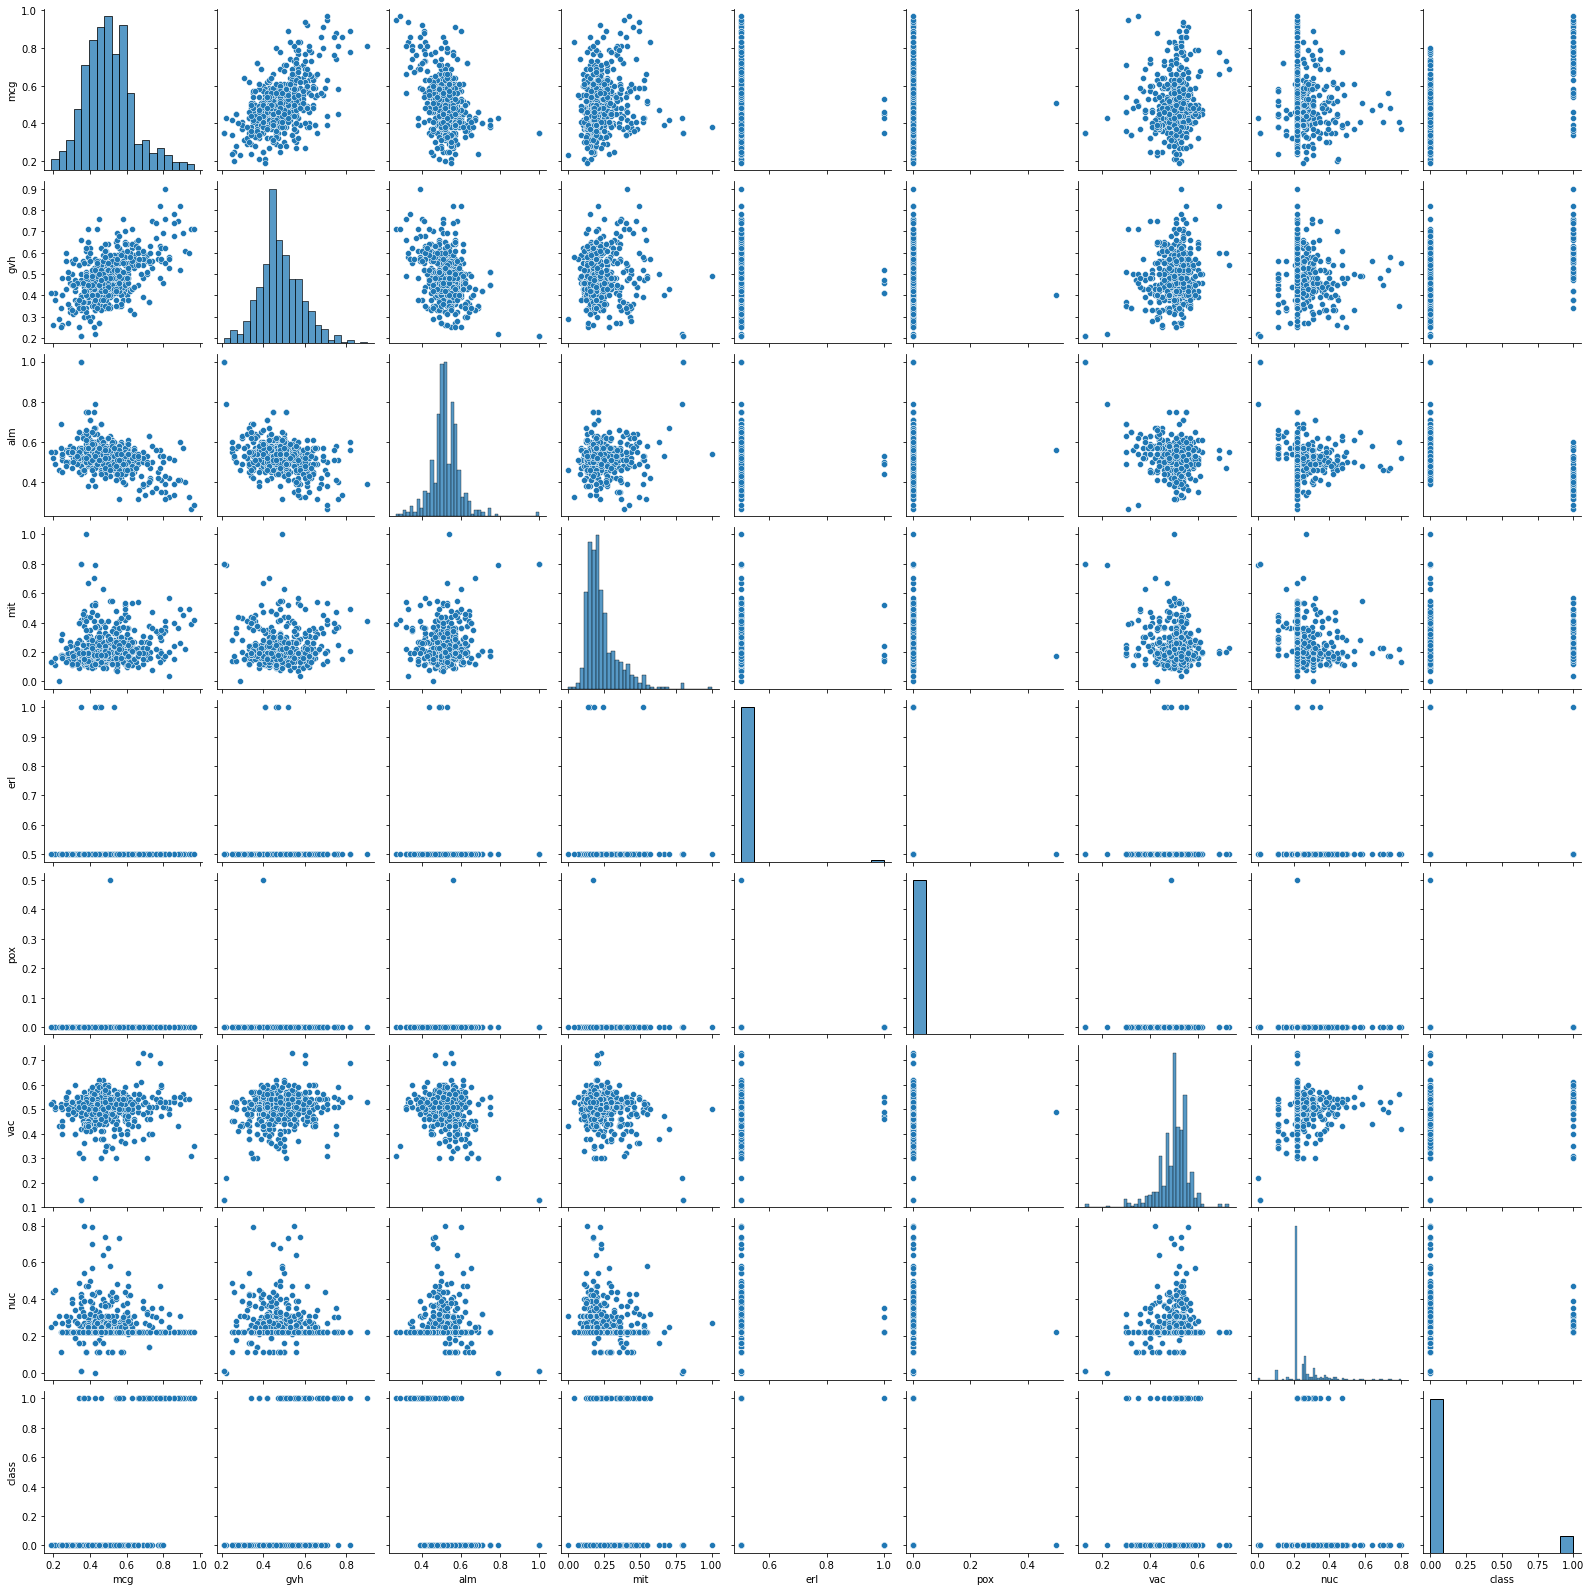

In [16]:
sns.pairplot(df)

# Model

In [17]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=200) 

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.rcParams['figure.figsize'] = [10, 10]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [22]:
pred_lr=LR.predict(X_test)
LR.score(X_test, y_test)

0.912621359223301

Confusion matrix, without normalization


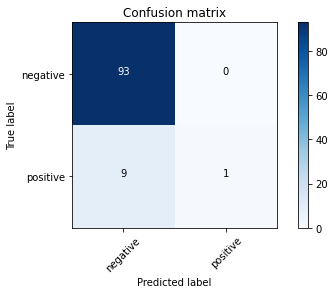

In [23]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['negative', 'positive'])

In [24]:
LR.n_features_in_

8

In [25]:
LR.intercept_

array([-4.85547953])

In [26]:
LR.sparsify()

LogisticRegression()

In [27]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.115007
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  411
Model:                          Logit   Df Residuals:                      402
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.6456
Time:                        14:51:32   Log-Likelihood:                -47.268
converged:                      False   LL-Null:                       -133.39
Covariance Type:            nonrobust   LLR p-value:                 4.368e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3993   9291.541      0.002      0.999   -1.82e+04    1.82e+04
x1            10.3601      2.633      3.935      0.000       5.20

C:\Users\viett\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Since p > |z | is significant at x1, x2, x3 because value is less than 0.05 means they are strongly related and have strong feature**

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression 

In [29]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.34631381849483456

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
pred_dt = DT.predict(X_test)
DT.score(X_test, y_test)

0.912621359223301

In [33]:
print(classification_report(y_test, pred_dt))

NameError: name 'classification_report' is not defined

# Q & A

## Analyse the importanance of the fwature for predicting presence or absence of protein using two different approaches. Explain the similarity/difference between outcomes.

1. mcg: Mcgeoch's method
2. gvh: von Heijne's method

these features are strongly correlated with protein 